# CAMS  European air quality Reanalysis data demo

## Introduction

This notebook demonstrates opening and plotting data from the Copernicus Atmosphere Monitoring Service (CAMS):
 - CAMS European air quality Reanalysis 

Data have been extracted for areas surrounding the four HARMONIA target cities: Milan, Piraeus, Ixelles and Sofia

All the air quality parameters are mass concentrations in $\mu \text{g}\, \text{m}^{-3}$

 
## CAMS European air quality Reanalysis 

Available for 2018 to 2021  (CAMS intend to add more recent years and to produce historical O3, NO2 and PM10 data for 2013 to 2017)

### Resolution
 - 0.1 degrees Horizontal resolution
 - 1 hourly temopral resolution

### Validated/Interim reanalysis
- 2018, 2019 and 2020 are validated reanalysis
- 2021 is interim reanalysis.

### Spatial grid
2020 data is produced on a different spatial grid to the other years. It has the same resolution but is offset by 0.5 degrees. All validated datasets from 2020 onwards (and interim datasets from 2021) will be produced on the, new, 2020 grid.

- In this repository, data in data/cams_europe_AQ_reanalyses/ has been interpolated to the native grid of the 2018, 2019 and 2021 data.
- data in data/cams_europe_AQ_reanalyses_2020grid/ has been interpolated to the native grid of the 2020 data.

This notebook opens and plots data on the 2018 (also 2019, 2021) grid.

 
## Parameters of particular interest

Some key air quality parameters that are subject to targets/directives/standards/guidlines:
 - pm2p5 : Particulate matter d <= 2.5 um
 - pm10  : Particulate matter d <= 10 um
 - co    : Carbon monoxide mass concentration
 - no2   : Nitrogen dioxide mass concentration
 - no    : Nitrogen monoxide mass concentration
 - go3   : Ozone mass concentration


<font size="1"> *Contains modified Copernicus Atmosphere Monitoring Service information [2023]. Neither the European Commission nor ECMWF is responsible for any use that may be made of the
Copernicus information or data it contains* </font>

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import xarray as xr

## The Harmonia cities

In [2]:
cities = ['Piraeus', 'Ixelles', 'Sofia', 'Milan']
## Chose one of the cities above
city = 'Milan'

## Open the CAMS European Air Quality reanalysis dataset for the chosen city

Get an xarray containing the data for the selected city

In [3]:
## This directory contains data on the same grid as the 2018 data
data_dir = f"data/cams_europe_AQ_reanalyses/{city}"

## The data are in multiple files, one per AQ variable per year. We can open them all together.
files = f"{data_dir}/cams_Eur_AQ_reanalysis_*.nc"

# ## You can open data for just one parameter and or one year, e.g. for pm2p5 and 2021:
# year = 2021
# var = 'pm2p5'
# files = f"{data_dir}/cams_Eur_AQ_reanalysis_{var}_{year}.nc"

## Open the data as an xarray
data = xr.open_mfdataset(files)

### Quick look at variables in the data set

In [4]:
# List the variables available in the data set
all_variables = list(data.keys())
print("Available variables :\n", all_variables)

Available variables :
 ['co', 'nh3', 'nmvoc', 'no', 'no2', 'o3', 'pans', 'pm10', 'pm2p5', 'so2']


In [5]:
# and the metadata for one of the variables
AQ_var = 'pm2p5'
print("\n metadata for pm2p5 :\n",data[AQ_var].attrs)


 metadata for pm2p5 :
 {'standard_name': 'mass_concentration_of_pm2p5_ambient_aerosol_in_air', 'long_name': 'mass concentration of particulate matter with d < 2.5µm', 'units': 'µg/m3', 'number_of_significant_digits': 3, 'source': 'mass concentration of particulate matter with d < 2.5µm at 0 meters above the surface from Ensemble median'}


### A closer look at the variables in the data set
Print the metadata for all of the variables \
The concentrations are in $\mu \text{g}\, \text{m}^{-3}$

In [6]:
# List the variables available in the data set
print(f"Available variables: {all_variables}\n")
print(f"Name  : (units)     Long name                            Standard name")
print(f"----------------------------------------------------------------------------------------")
for var in data.keys():
    spaces1 = ' '*(9 - len(data[var].attrs['units']))
    spaces2 = ' '*(35 - len(data[var].attrs['long_name']))
    print(f"{var:6}: ({data[var].attrs['units']}){spaces1} {data[var].attrs['long_name']} {spaces2}: ({data[var].attrs['standard_name']})")


Available variables: ['co', 'nh3', 'nmvoc', 'no', 'no2', 'o3', 'pans', 'pm10', 'pm2p5', 'so2']

Name  : (units)     Long name                            Standard name
----------------------------------------------------------------------------------------
co    : (µg/m3)     mass concentration of carbone monoxide : (mass_concentration_of_carbon_monoxide_in_air)
nh3   : (µg/m3)     mass concentration of ammonia       : (mass_concentration_of_ammonia_in_air)
nmvoc : (µg/m3)     mass concentration of nmvoc expressed as carbon in air : (mass_concentration_of_nmvoc_expressed_as_carbon_in_air)
no    : (µg/m3)     mass concentration of nitrogen monoxide : (mass_concentration_of_nitrogen_monoxide_in_air)
no2   : (µg/m3)     mass concentration of nitrogen dioxide : (mass_concentration_of_nitrogen_dioxide_in_air)
o3    : (µg/m3)     mass concentration of ozone         : (mass_concentration_of_ozone_in_air)
pans  : (µg/m3)     mass concentration of peroxyacyl nitrates : (mass_concentration_of_per

## Plot timeseries of concentrations for the city

Some formated labels to use in plotting

In [7]:
# formatted Labels for plots
labels = {'pm10':r"PM$_{10}$",
          'pm2p5':r"PM$_{2.5}$",
          'co': "CO",
          'no2': r"NO$_{2}$",
          'no': "NO",
          'o3': r"Ground Ozone", 
          'pans': "PAN",
          'so2': r"SO$_{2}$"}
# and for units
unit = r"$\mu g \ m ^{-3}$" 

### Plot the whole timeseries for one point

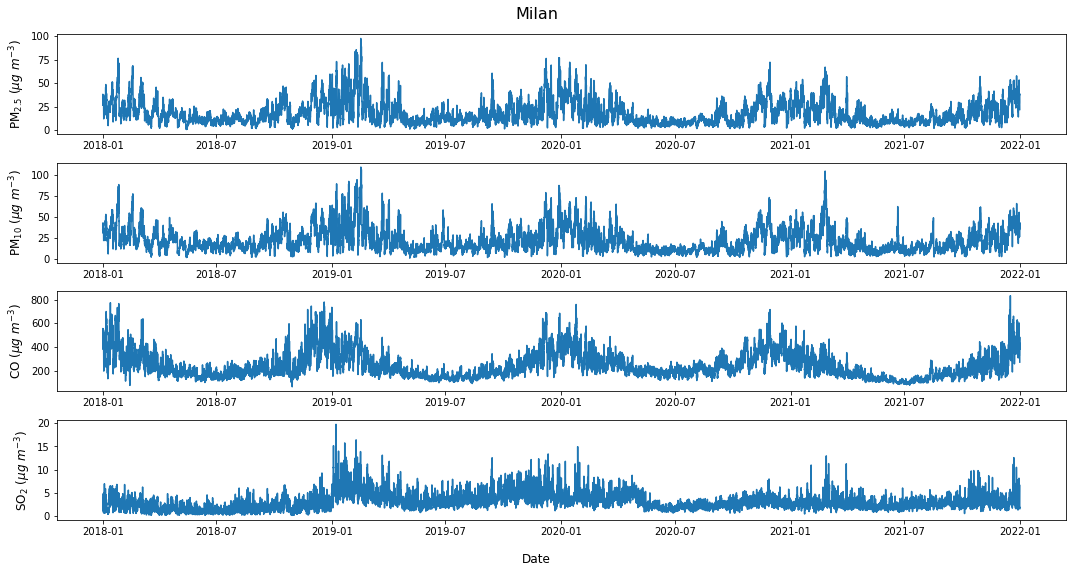

In [8]:
AQ_vars_to_plot = ['pm2p5', 'pm10', 'co', 'so2']

## Select one location
point = data.isel({'latitude':1, 'longitude':1})

fig, axs = plt.subplots(len(AQ_vars_to_plot), 1, figsize = (15, 2*len(AQ_vars_to_plot)), squeeze=False)
for ax, variable in zip(axs.flatten(), AQ_vars_to_plot):
    ax.plot(point.time, point[variable])
    ax.set_ylabel(f"{labels[variable]} ({unit})", size=12)

fig.supxlabel("Date", size=12)
fig.suptitle(city, fontsize=16)
fig.tight_layout()

### Plot data for one year

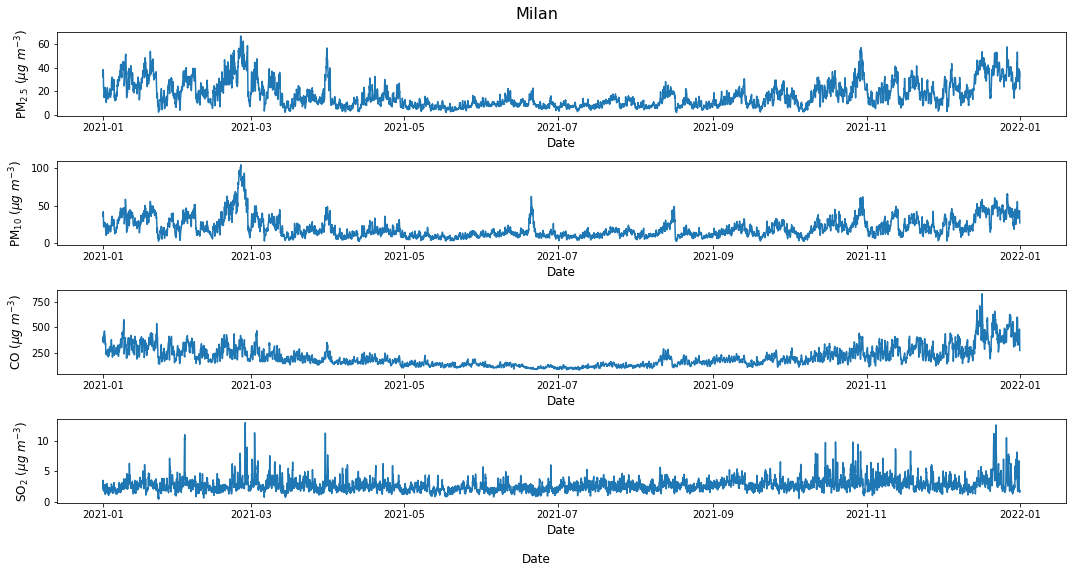

In [9]:
AQ_vars_to_plot = ['pm2p5', 'pm10', 'co', 'so2']

## Select one location
point = data.isel({'latitude':1, 'longitude':1})

## Identify data in year
year = 2021
in_year = data.time.dt.year == year

fig, axs = plt.subplots(len(AQ_vars_to_plot), 1, figsize = (15, 2*len(AQ_vars_to_plot)))

for ax, variable in zip(axs.flatten(),  AQ_vars_to_plot):
    ax.plot(point.time[in_year], point[variable][in_year])
    ax.set_ylabel(f"{labels[variable]} ({unit})", size=12)
    ax.set_xlabel("Date", size=12)

fig.supxlabel("Date", size=12)
fig.suptitle(city, fontsize=16)
fig.tight_layout()